In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda')

In [4]:
# hyper parameters

input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 1e-3


In [5]:
#MNIST
train_dataset = torchvision.datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)

In [6]:
test_dataset = torchvision.datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor())

In [7]:
train_loader = torch.utils.data.DataLoader(dataset =train_dataset, batch_size=batch_size, shuffle=True)

In [8]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
examples = iter(train_loader)
samples, labels = next(examples)

In [10]:
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


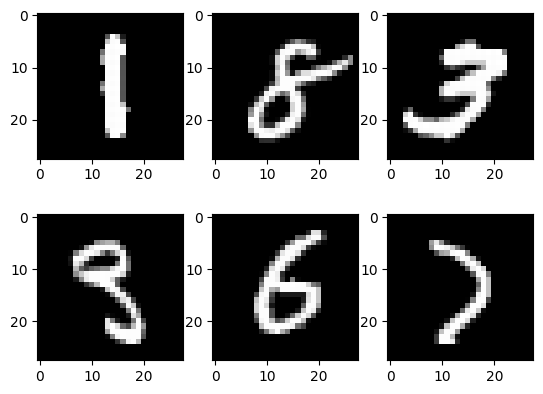

In [11]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [12]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out 

In [22]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [23]:
# loss
criterion = nn.CrossEntropyLoss()

In [24]:
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [28]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1 ,28,28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        #forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward
        optimizer.zero_grad() #empy de values in gradient
        loss.backward()
        optimizer.step()

        if (i+1)%100==0:
            print(f'epoch: {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch: 1 / 2, step 100/600, loss = 0.2071
epoch: 1 / 2, step 200/600, loss = 0.0829
epoch: 1 / 2, step 300/600, loss = 0.1530
epoch: 1 / 2, step 400/600, loss = 0.0785
epoch: 1 / 2, step 500/600, loss = 0.0836
epoch: 1 / 2, step 600/600, loss = 0.1560
epoch: 2 / 2, step 100/600, loss = 0.0839
epoch: 2 / 2, step 200/600, loss = 0.0681
epoch: 2 / 2, step 300/600, loss = 0.1261
epoch: 2 / 2, step 400/600, loss = 0.1477
epoch: 2 / 2, step 500/600, loss = 0.0640
epoch: 2 / 2, step 600/600, loss = 0.1914


In [29]:
# test

with torch.no_grad():
    n_correct=0
    n_samples=0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy= {acc}')

accuracy= 96.98
